In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
!ls data

calendar.csv
sales_train_validation.csv
sample_submission.csv
sell_prices.csv


# sales_train_validation.csv

In [4]:
df = pd.read_csv("data/sales_train_validation.csv")
print(df.shape)
df.head(20)

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


In [5]:
df["item_id"].nunique()

3049

In [6]:
df["cat_id"].value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [7]:
df["dept_id"].value_counts()

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64

In [8]:
df["store_id"].value_counts() # 3049 items

CA_4    3049
TX_3    3049
CA_2    3049
TX_2    3049
WI_1    3049
TX_1    3049
WI_2    3049
WI_3    3049
CA_1    3049
CA_3    3049
Name: store_id, dtype: int64

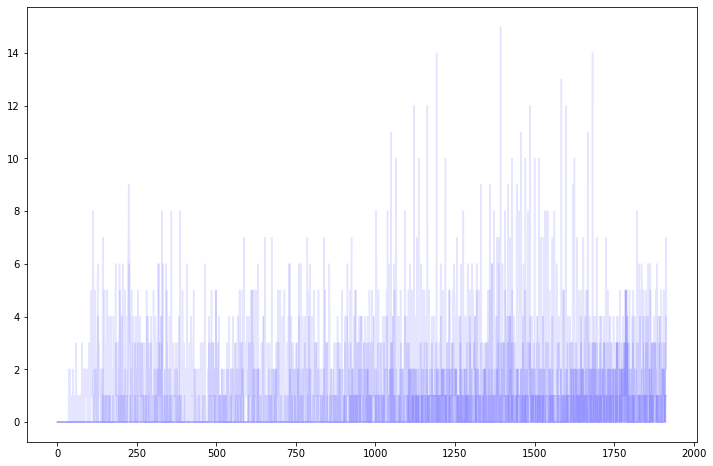

In [9]:
ca_1 = df[df["store_id"] == "CA_1"]

for i, row in ca_1.head(5).iterrows():
    plt.plot(range(1, 1914), row[6:], c="blue", alpha=0.1)

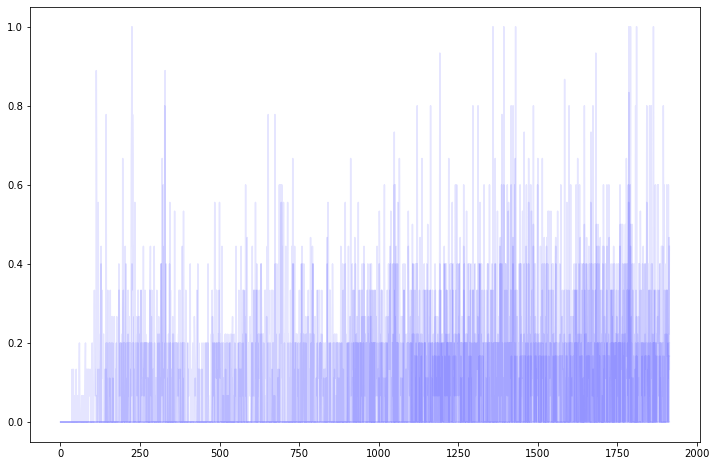

In [10]:
for i, row in ca_1.head(5).iterrows():
    plt.plot(range(1, 1914), row[6:] / max(row[6:]), c="blue", alpha=0.1)

# calendar.csv

In [11]:
df_cal = pd.read_csv("data/calendar.csv")
print(df_cal.shape)
df_cal.head(20)

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [12]:
df_cal["event_type_1"].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [13]:
df_cal["event_type_2"].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

# sell_prices.csv

In [14]:
df_price = pd.read_csv("data/sell_prices.csv")
print(df_price.shape)
df_price.head(20)

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [15]:
df_price["item_id"].nunique()

3049

In [16]:
df_price_grouped = df_price[["item_id", "sell_price"]]\
    .groupby("item_id")\
    .aggregate({
    "sell_price": ["mean", "std", "min", "median", "max"]
})
df_price_grouped.sample(20)

sell_price                              
                      mean       std   min median    max
item_id                                                 
FOODS_2_246       2.084884  0.152741  0.20   2.18   2.18
FOODS_2_208       7.071004  0.262358  3.50   6.98   7.47
FOODS_3_795       2.975017  0.038354  2.68   2.98   2.98
HOBBIES_2_043     0.970000  0.000000  0.97   0.97   0.97
FOODS_3_067       3.946655  0.072457  3.78   3.98   3.98
HOUSEHOLD_2_291   4.892717  0.183098  2.58   4.97   4.97
FOODS_2_061       1.954986  0.099181  1.39   2.00   2.37
HOUSEHOLD_2_203   2.970000  0.000000  2.97   2.97   2.97
HOBBIES_1_052     5.879102  0.029961  4.88   5.88   5.88
HOBBIES_1_014     1.008116  0.065361  0.98   0.98   1.16
HOUSEHOLD_2_191   5.012202  0.391271  1.99   4.67   5.44
HOUSEHOLD_1_436  10.861692  0.942651  4.97  10.97  11.97
HOUSEHOLD_1_500   4.439710  0.012049  3.94   4.44   4.44
FOODS_3_216       2.495167  0.072049  1.50   2.50   2.56
HOUSEHOLD_1_152   9.956587  0.308788  3.50   9.98   9.98
HOUSEHOLD_1_434   3.927755  0.096937  2.74   3.97   4.46
FOODS_2_048       7.957566  0.164074  4.00   7.97   7.98
FOODS_3_718       1.303411  0.188699  0.75   1.38   1.48
HOBBIES_2_092     4.970000  0.000000  4.97   4.97   4.97
FOODS_3_425       2.477395  0.067059  0.10   2.48   2.48

# sample_submission.csv

In [17]:
df_sub = pd.read_csv("data/sample_submission.csv")
print(df_sub.shape)
df_sub.head(20)

(60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,HOBBIES_1_006_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,HOBBIES_1_007_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,HOBBIES_1_009_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
